In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import visualize_X_samples_grid

import os
import numpy as np
import pandas as pd

# os.chdir(config.dirs.project_root)

In [3]:
from config import config

# Check Data Module

In [13]:
from src import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')
dl = dm.train_dataloader()

INFO     | setup | Loading Sprites
INFO     | setup | Loading Sprite Labels
INFO     | setup | Unique labels in training set: [0 1 2 3 4]
INFO     | setup | Counts of each class in training set: {0: 70, 1: 286, 2: 45, 3: 340, 4: 59}
INFO     | setup | Unique labels in validation set: [0 1 2 3 4]
INFO     | setup | Counts of each class in validation set: {0: 18, 1: 71, 2: 11, 3: 85, 4: 15}
INFO     | setup | Train Dataset       : 800 samples
INFO     | setup | Validation Dataset  : 200 samples


In [14]:
batch = next(iter(dl))
images, labels = batch
images.shape, labels.shape

(torch.Size([8, 3, 16, 16]), torch.Size([8]))

In [15]:
print(images.min(), images.max())
print(labels.min(), labels.max())

images_0_255 = images * 255.
print(images_0_255.min(), images_0_255.max())

tensor(0.) tensor(1.)
tensor(0, dtype=torch.int32) tensor(3, dtype=torch.int32)
tensor(0.) tensor(255.)


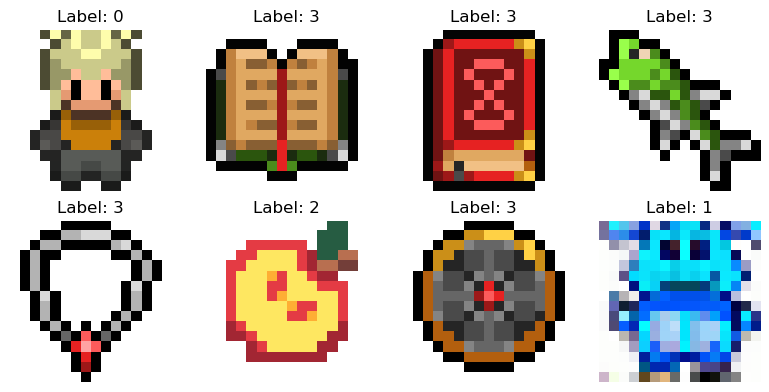

In [17]:
visualize_X_samples_grid(images, labels, n_samples=8, n_cols=4)

# Model

In [8]:
from src import SpriteLightning
light = SpriteLightning()

INFO     | __init__ | Number of Trainable Parameters : 4646691


In [9]:
noise_pred = light.checkout_forward_pass(batch)
noise_pred.shape

torch.Size([4, 3, 16, 16])

# Generate

Generating images from noise: 200it [00:39,  5.05it/s]


(torch.Size([20, 3, 16, 16]), torch.Size([20]))

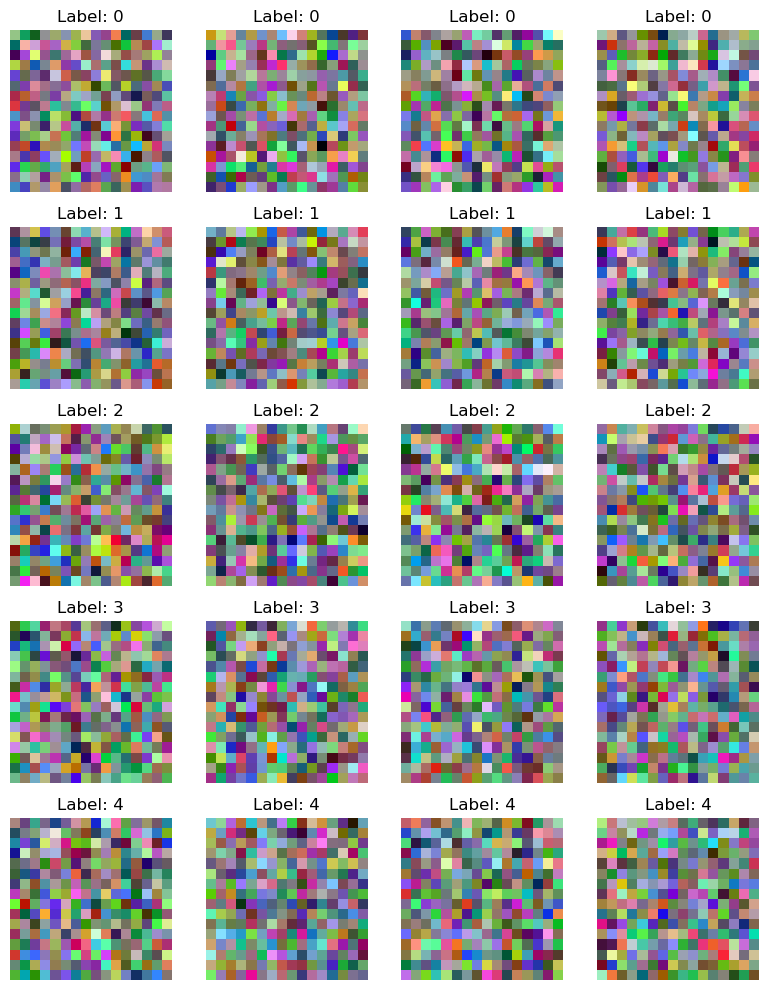

In [10]:
samples, labels = light.generate()
samples.shape, labels.shape

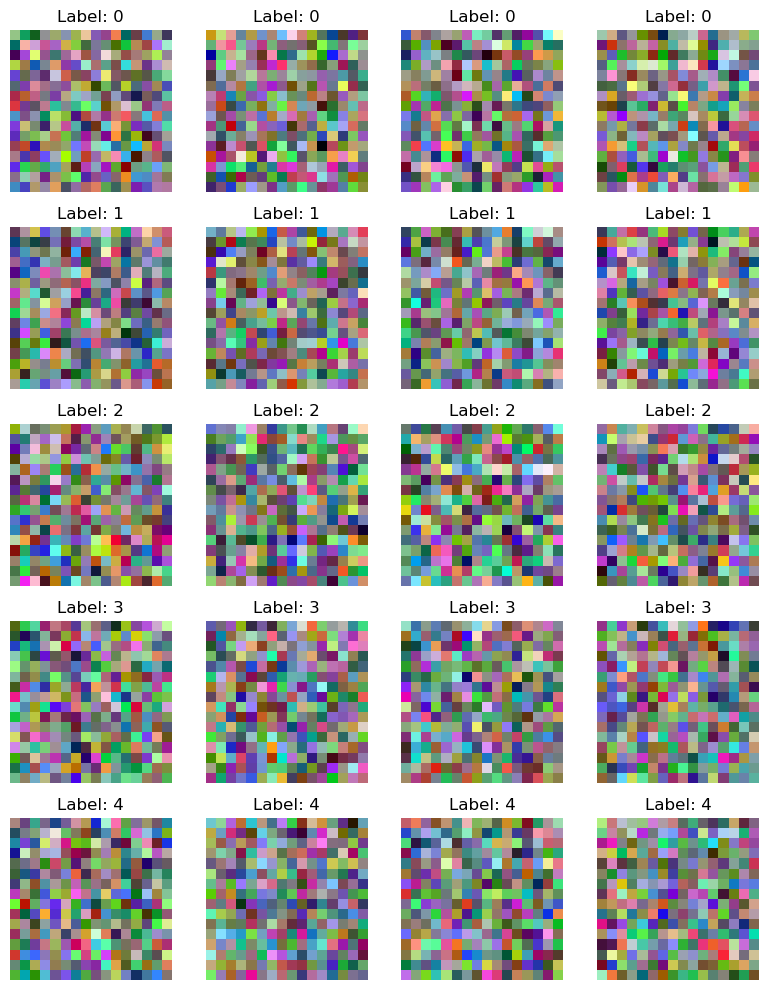

In [11]:
num_classes = 5
num_member_per_class = config.test.batch_size

visualize_X_samples_grid(
    samples, 
    labels, 
    n_samples=num_member_per_class * num_classes, 
    n_cols=num_member_per_class
)

# Test Images

(20, 3, 16, 16) (20,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..

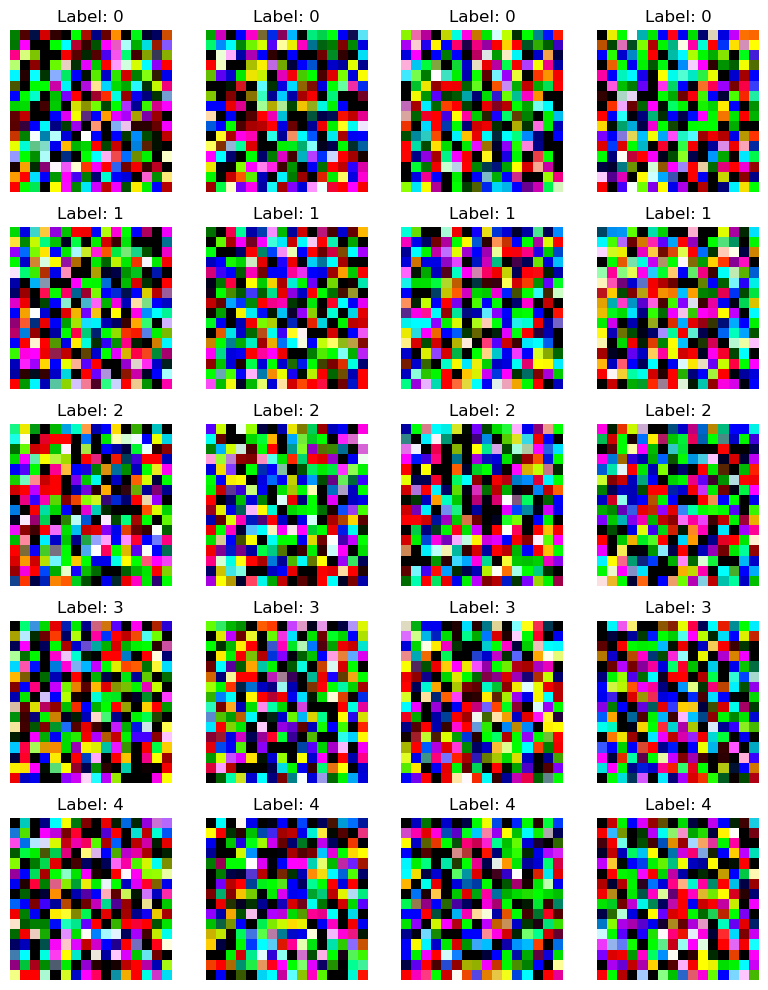

In [6]:
idx = 11
images = np.load(f'./output/test_images/samples_{idx}.npy')
# images = np.load(f'./output/test_images/pred_original_sample{idx}.npy')
labels = np.load(f'./output/test_images/labels_{idx}.npy')
print(images.shape, labels.shape)

num_classes = 5
num_member_per_class = config.test.batch_size

visualize_X_samples_grid(
    images, 
    labels, 
    n_samples=num_member_per_class * num_classes, 
    n_cols=num_member_per_class
)